In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
seeds = pd.read_csv('datasets/seeds.csv',header=None)
varieties = seeds[7].replace([1,2,3],["Canadian wheat","Kama wheat","Rosa wheat"])
samples = seeds.drop(7,axis=1)
samples

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


the SciPy linkage() function performs hierarchical clustering on an array of samples

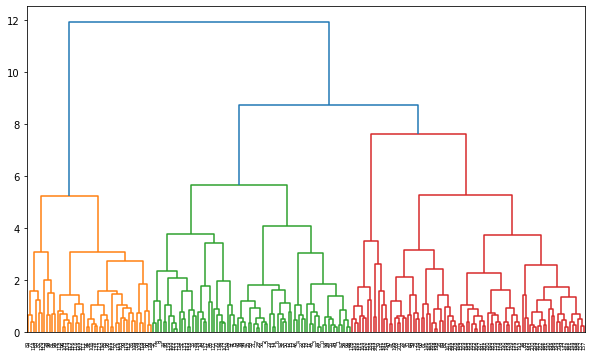

In [3]:
mergings = linkage(samples, method='complete')
dendrogram(mergings)
plt.show()

In [4]:
# Use fcluster to extract labels
labels = fcluster(mergings, 8, criterion='distance')

# Create crosstab
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df.labels, df.varieties)
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,0,47,0
2,52,23,0
3,18,0,70
